# AMAZON FINE FOOD REVIEWS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df.Summary.head(5)

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [6]:
df.Text.head(5)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [7]:
df1=df['Text'].iloc[3]

In [8]:
df1

'If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.'

# TEXT PREPROCESSING

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# for lemma,stopwords
from textblob import TextBlob
from textblob import Word 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [18]:
df['Text']=df['Text'].apply(lambda x:" ".join(x.lower()for x in x.split()))
# if x is the string "Hello world", then x.split() would return the list ['Hello', 'world']. By default, split() separates the string
# at each whitespace character (space, tab, newline) then lower it.

In [19]:
df['Text'].head(4)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
Name: Text, dtype: object

In [20]:
df['Text']=df['Text'].str.replace(r'[^\w\s]',' ')
#  the code removes punctuation and special characters from the 'Text' column, replacing them with spaces. 

In [21]:
df['Text'].head(4)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
Name: Text, dtype: object

In [22]:
stop = stopwords.words('english')

# Removing stopwords from the 'Text' column
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Displaying the first 5 elements of the modified 'Text' column
print(df['Text'].head(5))

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object


In [23]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Assuming 'text' is your DataFrame column containing text data
df['Text'] = df['Text'].apply(lambda x: " ".join(word for word in x.split() if word.lower() not in STOP_WORDS))
# spaCy has its own approach to stopword removal. Stopwords are common words that are often excluded from text processing tasks 
# because they are considered to carry little meaningful information.spaCy's language models come with their own set of stopwords,
# and you can use them to filter out these common words from your text data.
# en.stop_words import STOP_WORDS This line specifically imports the set of English stopwords

In [24]:
df['Text'].head(5)

0    bought vitality canned dog food products found...
1    product arrived labeled jumbo salted peanuts.....
2    confection centuries. light, pillowy citrus ge...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object

In [25]:
from tqdm import tqdm
from textblob import TextBlob

In [26]:
# lemmatization is a preprocessing step that contributes to the overall quality of text data for various NLP tasks. 
# It simplifies text, reduces redundancy,
# and facilitates more effective analysis and understanding of natural language.
#tqdm for loop 

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(x).lemmatize() for x in x.split()]))


**********************************************************************
  Resource wordnet not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('wordnet')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/wordnet

  Searched in:
    - 'C:\\Users\\ADMIN/nltk_data'
    - 'C:\\Program Files\\Python311\\nltk_data'
    - 'C:\\Program Files\\Python311\\share\\nltk_data'
    - 'C:\\Program Files\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\ADMIN\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


# EDA

In [27]:
datas=df

In [28]:
datas.dropna(inplace=True)

In [29]:
datas.shape

(568401, 10)

In [30]:
df.shape

(568401, 10)

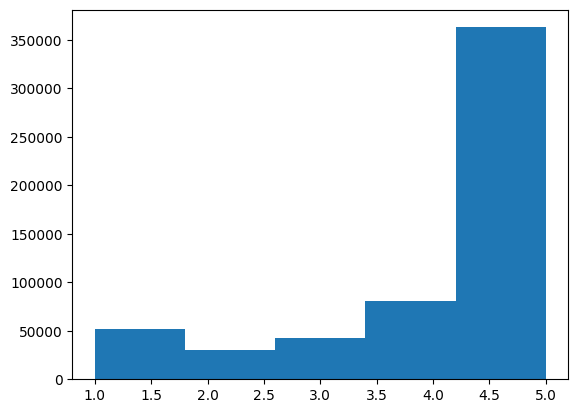

Score
1     52264
2     29743
3     42638
4     80654
5    363102
Name: Id, dtype: int64


In [33]:
datas.Score.hist(bins=5,grid=False)
plt.show()
print(datas.groupby('Score').count().Id) 

In [34]:
#The reason for sampling data, especially in machine learning or data analysis tasks, is to create a balanced dataset or to reduce the overall size 
#of the dataset for quicker processing. If you're dealing with imbalanced classes, where one class has significantly more samples than the other,
#sampling can help ensure that your model is trained on a representative set of examples from each class.
Score_1 = datas[datas['Score']==1].sample(n=29743)
Score_2 = datas[datas['Score']==2].sample(n=29743)
Score_3 = datas[datas['Score']==3].sample(n=29743)
Score_4 = datas[datas['Score']==4].sample(n=29743)
Score_5 = datas[datas['Score']==5].sample(n=29743)

In [35]:
bal_data=pd.concat([Score_1,Score_2,Score_3,Score_4,Score_5])
# you might want to concatenate (combine) this subset with other subsets or the original dataset. This process is often done to balance the dataset 
#if you have different classes with imbalanced sample sizes.

In [36]:
bal_data.reset_index(drop=True,inplace=True)

In [37]:
bal_data.shape

(148715, 10)

In [38]:
bal_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,224999,B000JIMSBC,A35QY34RGSVLRK,"Matthew VanAndel ""Veraxus""",10,10,1,1270598400,Sold by Dishonest Foods,getting amazon emails coins listed - presumabl...
1,488673,B005K4Q1YA,A11PM0C1979EZA,D. Garey,3,4,1,1345766400,Plastic taste,coffee tried got keurig. disappointed flavor; ...
2,508757,B002T5TMWG,AOW3PQ842KXEN,Soteris1,2,5,1,1326153600,Salty,"salty me, again, wish knew it.<br />i gave awa..."
3,52773,B002N3EIZ0,A17771LTRWSKQ5,Helen S. Lam,0,0,1,1335225600,Slimey and disgusting!,initial taste roasted chestnuts positive! howe...
4,2236,B002C4HZ00,AOWGK8BFJ4YBV,LoveDOP,0,0,1,1322870400,D.O.P? Not really....,product image misleading. image tomatoes d.o.p...


In [39]:
bal_data.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
148710,330623,B007N04BZA,A2696CFF1SBXH0,California_Girl,1,1,5,1341360000,Delicious,close cooking scratch. work asked about. add h...
148711,87226,B001EO616S,A1ER3LE9XDB5LD,John Santiago,2,2,5,1293494400,Best tasting honey!,received item(s) damaged (2 4 bottles seals ai...
148712,529903,B00028HN5A,A2M96WD9PNTXTB,"S. Venz ""Bree in NJ""",0,0,5,1335744000,My cats love it,i've tried brands catnip; definitely cats' fav...
148713,182197,B0000TBK6O,A3F45OZFJO0BDX,the random buyer,1,1,5,1264896000,happy,loved dressing. moved online. best price wante...
148714,113192,B0030F70LO,A3OCEOGBUBTR5W,D. Sharog,1,1,5,1289174400,Dog Treats,healthy treats standard american eskimo dog. one.


In [40]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [41]:
new=bal_data.Summary.str.cat()
# concat because all strings of words into single unit

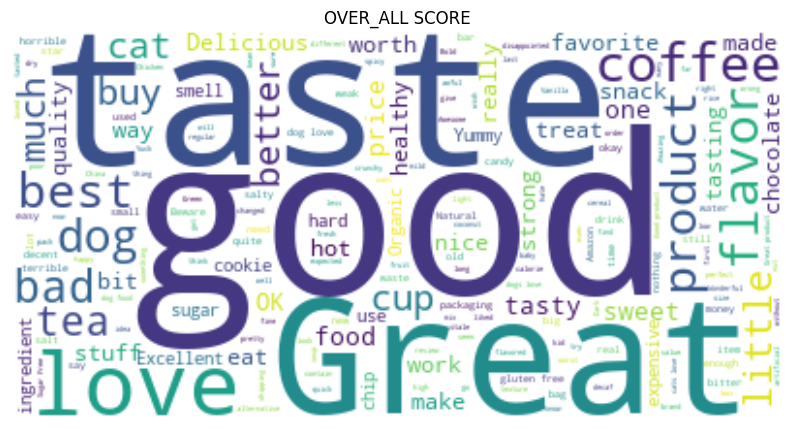

In [42]:
WordCloud=WordCloud(background_color ='white').generate(new)
plt.figure(figsize=(10,8))
plt.imshow(WordCloud,interpolation='bilinear')
plt.axis("off")
plt.title("OVER_ALL SCORE")
plt.show()

In [43]:
bal_data[bal_data['Score']==1]['Text'].loc[1]

'coffee tried got keurig. disappointed flavor; tasted like plastic (like drinking bottled water left hot car). thought maybe cleaned keurig water brewed cup...same horrible taste. recommend brand anyone.'

In [44]:
negative_reviews=bal_data[bal_data['Score'].isin([1,2])]
positive_reviews=bal_data[bal_data['Score'].isin([4,5])]

In [45]:
negative_review_str=negative_reviews.Summary.str.cat()
positive_review_str=positive_reviews.Summary.str.cat()

In [46]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
WordCloud_negative=WordCloud(background_color ='white').generate(negative_review_str)

In [47]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
WordCloud_positive=WordCloud(background_color ='white').generate(positive_review_str)

Text(0.5, 1.0, 'REVIEWS WITH POSITIVE SCORE')

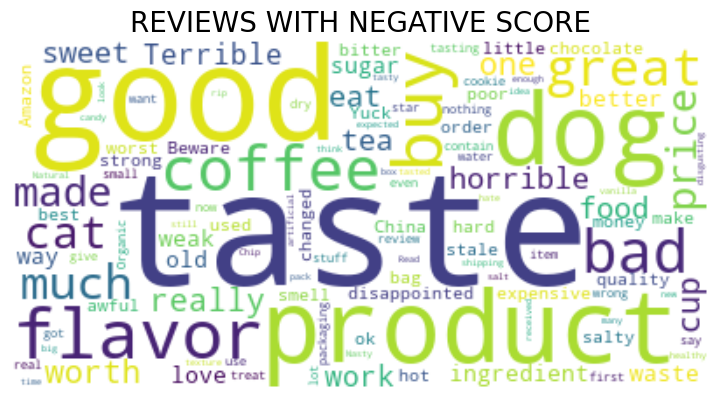

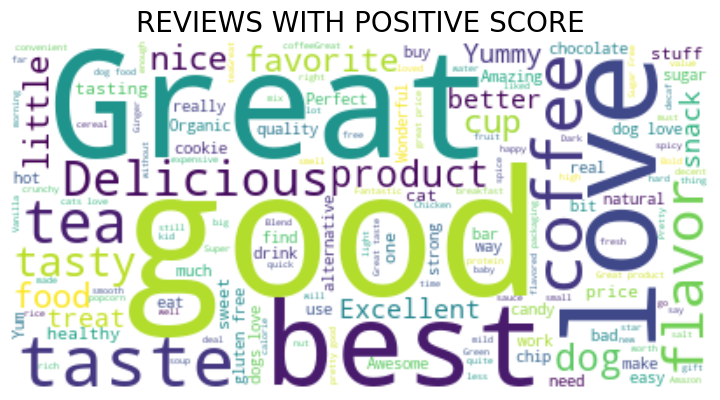

In [48]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,1,2)
ax1.imshow(WordCloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title("REVIEWS WITH NEGATIVE SCORE",fontsize=20)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,1,2)
ax1.imshow(WordCloud_positive,interpolation='bilinear')
ax1.axis("off")
ax1.set_title("REVIEWS WITH POSITIVE SCORE",fontsize=20)

# FEATURE ENGINEERING

In [49]:
!pip install vaderSentiment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re 
import os
import sys
import ast
plt.style.use('fivethirtyeight')

Defaulting to user installation because normal site-packages is not writeable


In [50]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [51]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import pandas as pd

analyzer=SentimentIntensityAnalyzer()

emptyline=[]
for row in tqdm(df['Text'],total=len(df),desc='AnalzingSentiment'):
         vs=analyzer.polarity_scores(row)
         emptyline.append(vs)

df_Sentiment=pd.DataFrame(emptyline)
df_Sentiment.head(5)

AnalzingSentiment: 100%|█████████████████████████████████████████████████████| 568401/568401 [08:49<00:00, 1074.29it/s]


,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.163,0.571,0.267,0.7926
3,0.000,0.861,0.139,0.4404
4,0.000,0.369,0.631,0.9468


In [52]:
np.where(df_Sentiment['compound']>=0,'positive','negative')

array(['positive', 'negative', 'positive', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [53]:
df_Sentiment['sentiment_score']=np.where(df_Sentiment['compound']>=0,'positive','negative')
df_Sentiment.head(5)

,neg,neu,pos,compound,sentiment_score
0,0.000,0.503,0.497,0.9413,positive
1,0.129,0.762,0.110,-0.1027,negative
2,0.163,0.571,0.267,0.7926,positive
3,0.000,0.861,0.139,0.4404,positive
4,0.000,0.369,0.631,0.9468,positive


In [54]:
df_Sentiment['sentiment_score'].value_counts()

sentiment_score
positive    526670
negative     41731
Name: count, dtype: int64

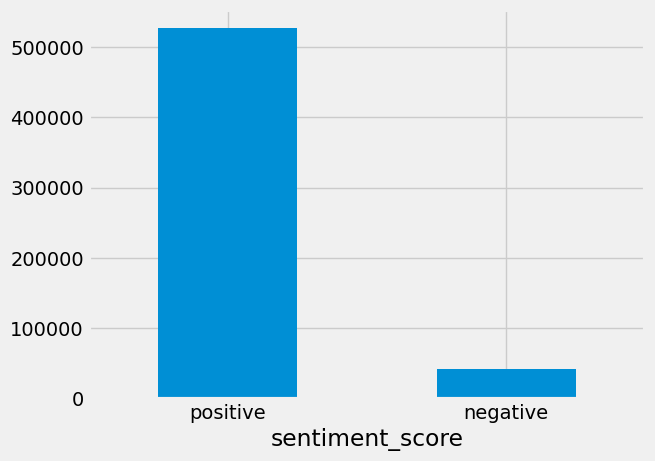

In [55]:
results= df_Sentiment['sentiment_score'].value_counts()
results.plot(kind='bar',rot=0);